# Linear Regression

Linear regression is a subset of supervised machine learning where we find the line of best fit in some already labelled training data and use this trendline to predict other values. This is particularly useful in data where there is already a strong correlation. Although we only live in four dimensions, can only think in three dimensions spatially, and can only conveniently display two dimensions on screen, linear regression is often done with dosens of inputs that create a set of high dimensional vectors where the trendline is truly drawn, however we can only graph two of the values. This allows for much more reliable predictions using a wide variety of variables.

The linear regression algorithm is given labelled 'ground truth' data that it is trying to predict and it is then tuned to predict this value. While most of the data is used for training, as with many types of machine learning it is best to keep some of the data out of the training set to test the ai at the end and prevent overfitting to only the test data.

## Importing the Libraries

First, the libraries need to be imported. If you don't have these libraries installed, run 
```
pip install pandas
pip install numpy
pip install matplotlib
pip install scikit-learn
```
in terminal. 

In [413]:
import pandas as pd; # Used for dealing with dataset(s).
import numpy as np; # Makes arrays and applies array wide functions on the dataset.
import matplotlib.pyplot as pyplot; # Makes the graphs/scatter plot and trendline.
import sklearn; # Performs the complex mathematics required for some parts of the code making the process of programming the ai much less laborious.
from sklearn import linear_model; # Get the algorithm for linear regression and model selection.
from matplotlib import style; # Gets additional features to get more control over the graphs and graph styling.
from scipy import stats; # Allows for easier data manipulation and finding the standard diviation/z score of each data point (). 

## Importing the Data

After the libraries have been imported we extract the example dataset from the csv downloaded from the [UCI database](https://archive.ics.uci.edu/dataset/162/forest+fires). This dataset is seperated by commas as is the norm, however some datasets are seperated by semicolons or other punctuation marks and this needs to be specified. Then we check that all the data got imported properly by printing the 'head' or the top few values from the dataset.

In [414]:
data = pd.read_csv("forestfires.csv", sep=","); # Import the labelled data from the .csv file and convert it into the array, seperating each data point based on the ",".
print(data.head()); # Print the first half a dosen values from the data to check that the data was imported properly.

   X  Y month  day  FFMC   DMC     DC  ISI  temp  RH  wind  rain  area
0  7  5   mar  fri  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0   0.0
1  7  4   oct  tue  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0   0.0
2  7  4   oct  sat  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0   0.0
3  8  6   mar  fri  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2   0.0
4  8  6   mar  sun  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0   0.0


## Data Cleaning

As you can see above, some of the data is in strings but the linear regression algorithm can only work with numbers so we need to add and implement a dictionary for the days and months. 

Additionally, some of the variables have non-linear relationships so we compensate for this by replacing all the values with their log value. This makes the data useable for *linear* regression.

Finally, outliers can significantly distort the data and reduce accuracy so we romove any data points that are further than 2.5 standard diviations from the mean.

In [415]:
# Dictionary to replace days and months with integer values because the linear regression can only work with numbers.
days = {'mon': 0, 'tue': 1, 'wed': 2, 'thu': 3, 'fri': 4, 'sat': 5, 'sun': 6}; 
months = {'jan': 0, 'feb': 1, 'mar': 2, 'apr': 3, 'may': 4, 'jun': 5, 'jul': 6, 'aug': 7, 'sep': 8, 'oct': 9, 'nov': 10, 'dec': 11}; 

# Convert days and months to numbers.
data["day"] = data["day"].replace(days); 
data["month"] = data["month"].replace(months); 

skewed = ["FFMC", "DC", "ISI", "RH", "rain"]; # All the values that have high skewed values as determined by https://github.com/e-hossam96/Forest-Fires-Regression/blob/main/Notebook-01-Linear-Regression.ipynb. 
for skew in skewed:
    data[skew] = np.log1p(data[skew]); # Log all of the skewed data to account for the skew and offset it to make the data more suitable for LINEAR regression.

for column in data.columns:
    data = data[np.abs(stats.zscore(data[column])) < 2.5]; # This exludes all the outliers from the dataset by getting the z score (number of standard diviations from the average) and excluding any with a zscore more than 2.5.

C:\Users\Phoen\AppData\Local\Temp\ipykernel_4176\2198054933.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data["day"] = data["day"].replace(days);
C:\Users\Phoen\AppData\Local\Temp\ipykernel_4176\2198054933.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data["month"] = data["month"].replace(months);


## Choose What to Predict

Here the variable to be predicted is defined and seperated from the other data for training. The value that will be plotted against in the graph at the end to see how well the linear regession algorithm is. 

In [416]:
predict = "DC"; # This is the value that the linear regeression algorithms is supposed to predict. DC seemed to be the most compatible variable with linear regression and easiest to predict.
compare = "month"; # This is the value that will be used to plot the graph to compare with the 'predict' value. It is defined up here so that all the variables are in the same place. Month was second best for linear regression and seems to form a strong correlation with the DC values.
x = np.array(data.drop(predict, axis=1)); # Set x to be the dataset but without the value to be predicted.
y = np.array(data[predict]); # Set y to the value to be predicted.

## Traing Data vs Testing Data

In machine learning, to prevent overfitting, the data is often split into two partitions; testing data and training data.

Overfitting is when the machine learning algorithm effectively 'memorises' the training data so that, while it achives very high scores on the training data, it fails to effectively predict real world data. As the point of ai is to predict patterns in the real world, this is obviously not very good. To control for this, usually about 20% of the data will be removed from the training data and used to test the accuracy of the ai on data it has never seen. The remaining data is then given to the ai for training.

In [417]:
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x,y,test_size=0.2); # Seperate the data into the training data and testing data at a ratio of 4:1. Really the data is split into training data used to predict (x_train), the training data to be predicted (y_train), the testing data used to predict (x_test), and the testing data to be predicted (y_test). 

## Training the AI

Here, the linear regression model from sklearn is created and tained on the training data. Then to test the accuracy the linear regression algorithm is compared to the training data and the accuracy is printed.

In [418]:
linear = sklearn.linear_model.LinearRegression(); # Create the linear regression algorithm from sklearn.
linear.fit(x_train, y_train); # Train the model using the training data.
acc = linear.score(x_test, y_test); # Test the linear regression model against the test data.
print("Accuracy:", acc, "or ", str(acc*100) + "%"); # Print the accuracy of the ai as a decimal and as a percentage. Using the str() function is required to remove the space between the accuracy and the percentage sign.

Accuracy: 0.9754532447545747 or  97.54532447545748%


In [419]:
print("coefficient: ", linear.coef_); # Prints the list of coefficients/gradients generated for each of the variables plotted against the value to be predicted. 
print("Intercept: ", linear.intercept_); # The predicted value of the value to predict where all other variables are 0. Note: due to the high dimensions it is prone to jump around a bit between models.

coefficient:  [ 1.83872028e-03 -1.62832560e-02  3.14961591e-01 -8.09496921e-03
 -7.33103709e-01  3.03162338e-03  1.21053421e-01  5.45261461e-03
  3.24181192e-02 -5.15776060e-03 -5.78624547e-01 -6.09662202e-04]
Intercept:  6.671200098885888


In [420]:
predictions = linear.predict(x_test); # Get the ai's predictions for all the test values.
for x in range(len(predictions)): # Loop through all of the predictions.
    print(predictions[x], x_test[x], y_test[x]); # Print the ai's predictions, the ai's inputs, and the real values to check that everything is working as it should be.

6.349336720835458 [  2.           4.           7.           1.           4.56226268
 108.3          2.89037176  20.1          3.71357207   4.
   0.           0.        ] 6.474045005433671
6.606533147402751 [  2.           5.           7.           5.           4.550714
 231.1          2.24070969  18.9          4.17438727   4.9
   0.           0.        ] 6.5738198220128945
6.583712394098515 [ 7.          4.          8.          4.          4.53367418 99.
  2.360854   20.6         3.78418963  3.6         0.          2.03      ] 6.615127664137342
6.363288356062583 [  3.           4.           7.           6.           4.56330598
 130.3          2.71469474  23.4          3.71357207   5.8
   0.           1.29      ] 6.3768970014659105
6.3850463894550575 [  7.           4.           7.           6.           4.52612698
 142.4          2.4510051   20.1          3.68887945   5.4
   0.           2.74      ] 6.400921676485684
6.579362392724082 [  4.           3.           8.           5.       

# Plot the Data

Here we can finally plot the values and compare them to the predicted linear regression line. As there are 13 different variables and plotting more than 3 is generally confusing, we can only plot 2 variables against eachother. Month and DC seemed to be the variables with the best linear relationship as mentioned earlier when the predict and compare variables were defined.

Here we also use the coefficient value for month (the third column in the data array) as printed above to get the gradient of the linear regression prediction and draw the trendline in.

9


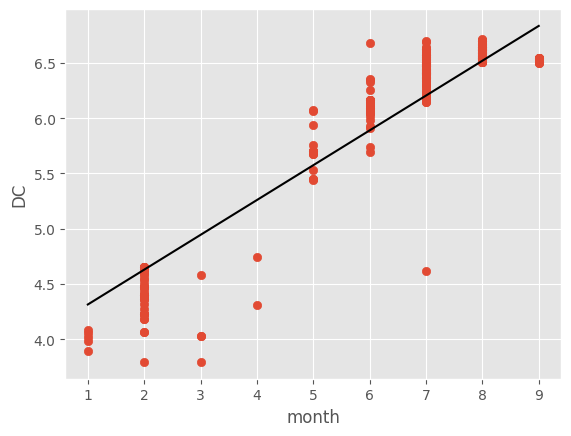

In [421]:
style.use("ggplot"); # Set the style of the plot.
pyplot.scatter(data[compare], data[predict]); # Plot the data values for the predict variable against the compare variable to compare them.
pyplot.xlabel(compare); # Set the x label to compare so you can see what varibles are being plotted.
pyplot.ylabel(predict); # Set the y label to predict so you can see what varibles are being plotted.

slope = linear.coef_[2]; # Get the predicted coefficient of the line of best fit by the linear regression ai.
intercept = 4; # linear.intercept_ # We only want the approximate value of predict where comparee is 0 but the predicted value is where all other variables are 0 which means that it is usually considerably off unless you manually tune it and due to the high dimensions the intercept is prone to jump around a bit between models.

print(data["month"].max())
x_range = np.linspace(data[compare].min(), data[compare].max(), len(data[compare])); # Set the range of the regression line across the x axis. This should be the same as the range of compare values.
y_range = slope * x_range + intercept; # The formula for the line given any x (compare) value calculated using the slope/gradient, the possible values of x, and the intecept.
pyplot.plot(x_range, y_range, color='black', label='Regression Line'); # Plot the regression line.

pyplot.show(); # Display the graph.